In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 🍽️ Zomato Bangalore Restaurant Data Analysis

This project analyzes a Zomato dataset of restaurants in Bangalore. We explore:
- Restaurant distribution across locations
- Relationship between cost, rating, and restaurant types
- Availability of online ordering and table booking

The goal is to extract insights helpful for food businesses and consumers.
"""

In [3]:
df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")


In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
columns_to_drop = ['url', 'phone', 'address', 'menu_item''listed_in(city)']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")


In [9]:
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], [None, None, None])
df['rate'] = df['rate'].str.strip().str.replace("/5", "").astype(float)

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_costfor_two_people,reviews_list,menu_item,listed_intype,listed_incity
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].str.replace(',', '').astype(float)


In [12]:
df['rest_type'] = df['rest_type'].fillna('Unknown')
df['cuisines'] = df['cuisines'].fillna('Various')

In [13]:
df.dropna(subset=['rate', 'approx_costfor_two_people'], inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

### 1. 📦 Online Order Availability


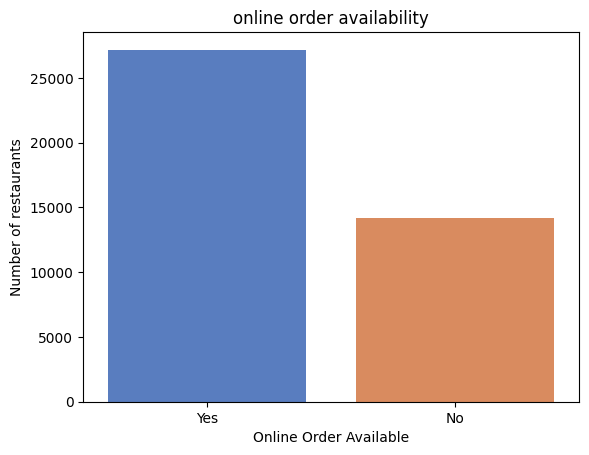

In [15]:
sns.countplot(data = df ,x = 'online_order', palette='muted')
plt.title('online order availability')
plt.xlabel('Online Order Available')
plt.ylabel('Number of restaurants')
plt.show()

### 2. 🍽️ Table Booking Availability

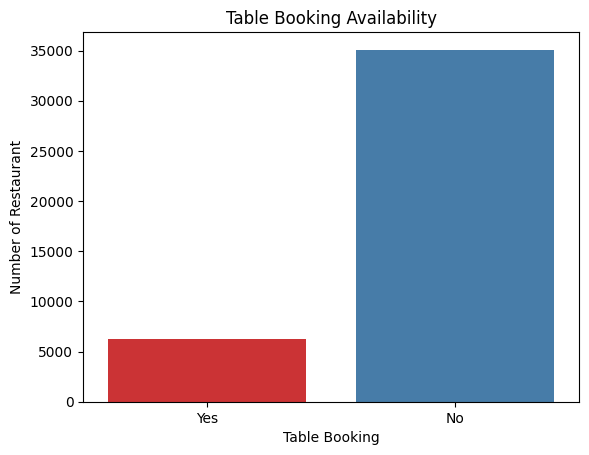

In [16]:
sns.countplot(data = df, x = 'book_table',palette='Set1')
plt.title('Table Booking Availability')
plt.xlabel('Table Booking')
plt.ylabel('Number of Restaurant')
plt.show()

### 3. 📈 Table Booking vs Rating


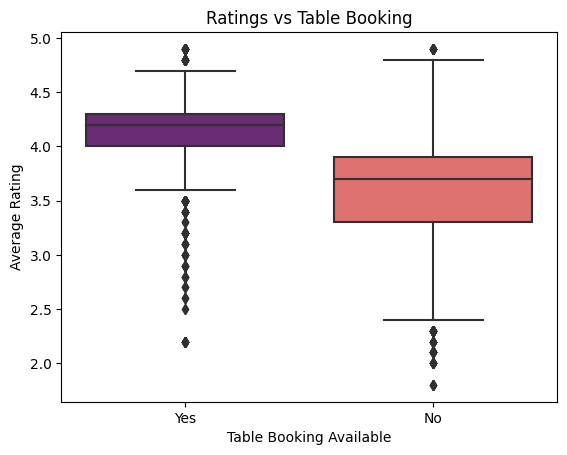

In [17]:
sns.boxplot(data = df , x= 'book_table',y='rate',palette ='magma')
plt.title('Ratings vs Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Average Rating')
plt.show()

### 4. 🌍 Top 10 Restaurant Locations


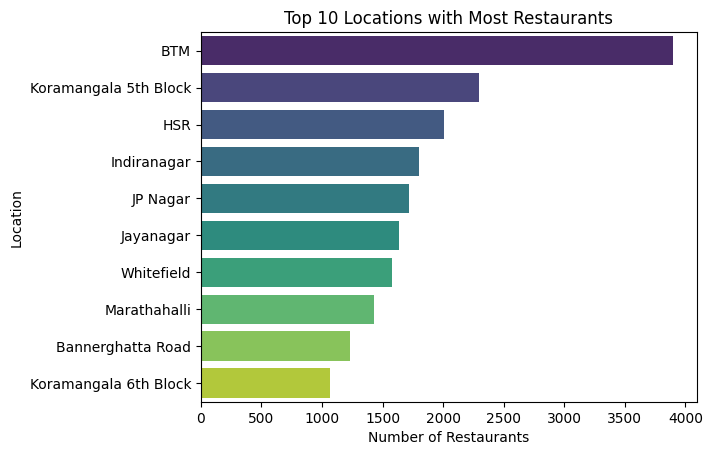

In [18]:
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()##

### 5. 🏷️ Top 10 Restaurant Types


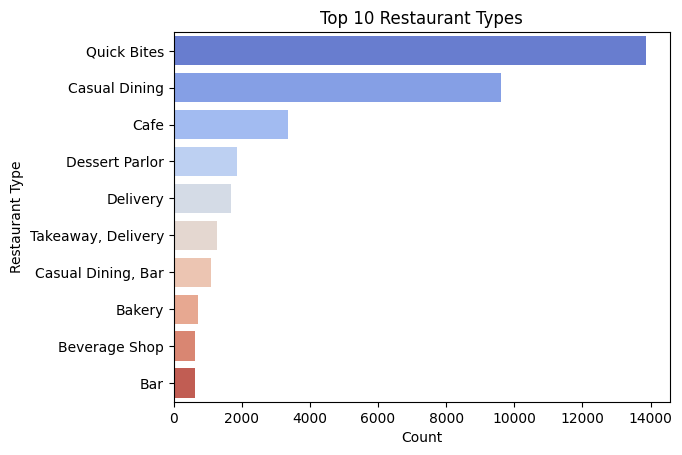

In [19]:
top_types = df['rest_type'].value_counts().head(10)
sns.barplot(x = top_types.values , y = top_types.index, palette = 'coolwarm')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

In [20]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_costfor_two_people,reviews_list,menu_item,listed_intype,listed_incity
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### 6. 🥘 Top 10 Cuisines Offered


In [21]:
df['cuisines_list'] = df['cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])


In [22]:
from collections import Counter
cuisine_counter = Counter()
for cuisines in df['cuisines_list']:
    cuisine_counter.update(cuisines)
cuisine_df = pd.DataFrame(cuisine_counter.items(), columns=['Cuisine', 'Count'])
top_cuisines = cuisine_df.sort_values(by='Count', ascending=False).head(10)


In [23]:
top_cuisines

,Cuisine,Count
0,North Indian,17289
2,Chinese,12914
7,South Indian,6363
14,Fast Food,6334
11,Continental,5199
21,Biryani,5051
4,Cafe,4784
20,Desserts,4511
13,Beverages,3834
6,Italian,3186


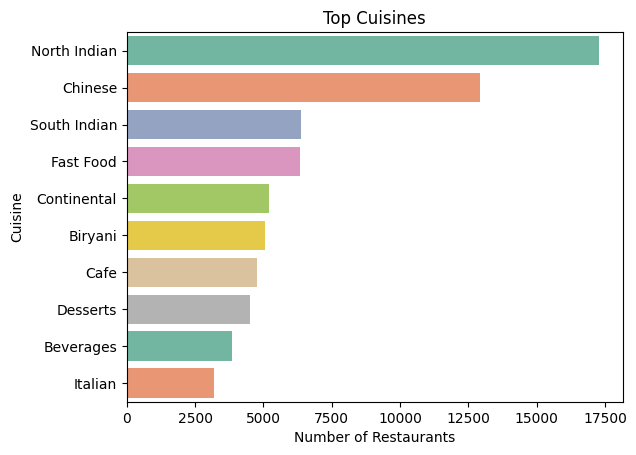

In [24]:
sns.barplot(data=top_cuisines, x='Count', y='Cuisine', palette='Set2')
plt.title('Top Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

### 7 Restaurant Type Distribution


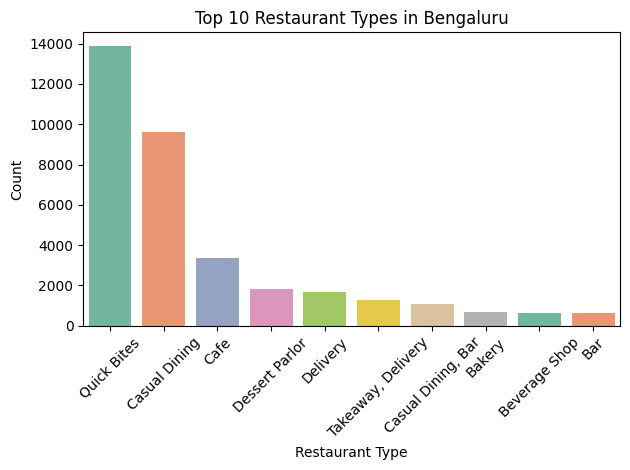

In [25]:
rest_type10 = df['rest_type'].value_counts().head(10)
rest_type_df = rest_type10.reset_index()
rest_type_df.columns = ['rest_type', 'count']
sns.barplot(data=rest_type_df, x='rest_type', y='count', palette='Set2')
plt.xticks(rotation=45)
plt.title("Top 10 Restaurant Types in Bengaluru")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

###  8 Rating vs Cost for Two

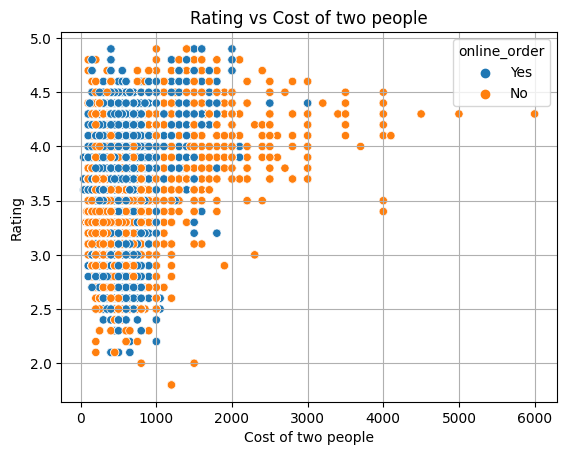

In [26]:
sns.scatterplot(data=df, x='approx_costfor_two_people', y='rate', hue='online_order')
plt.title('Rating vs Cost of two people')
plt.xlabel('Cost of two people')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


### 9 Service Type vs Rating

In [27]:
service_type_rating = df.groupby('rest_type')['rate'].mean().sort_values(ascending=False).reset_index()
xy = service_type_rating.head(10)


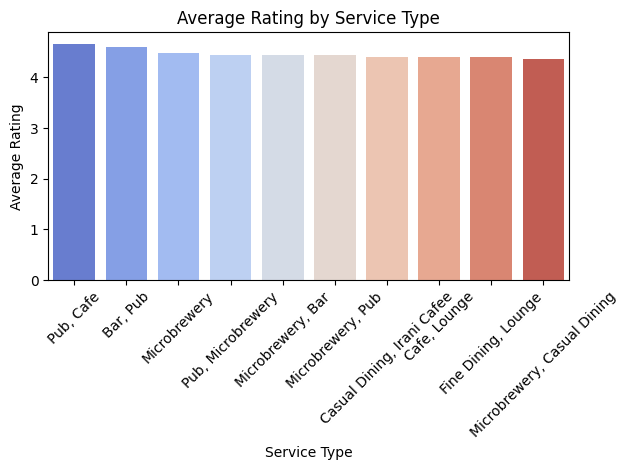

In [28]:
sns.barplot(data=xy, x='rest_type', y='rate', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Rating by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


###  Service Type vs Rating

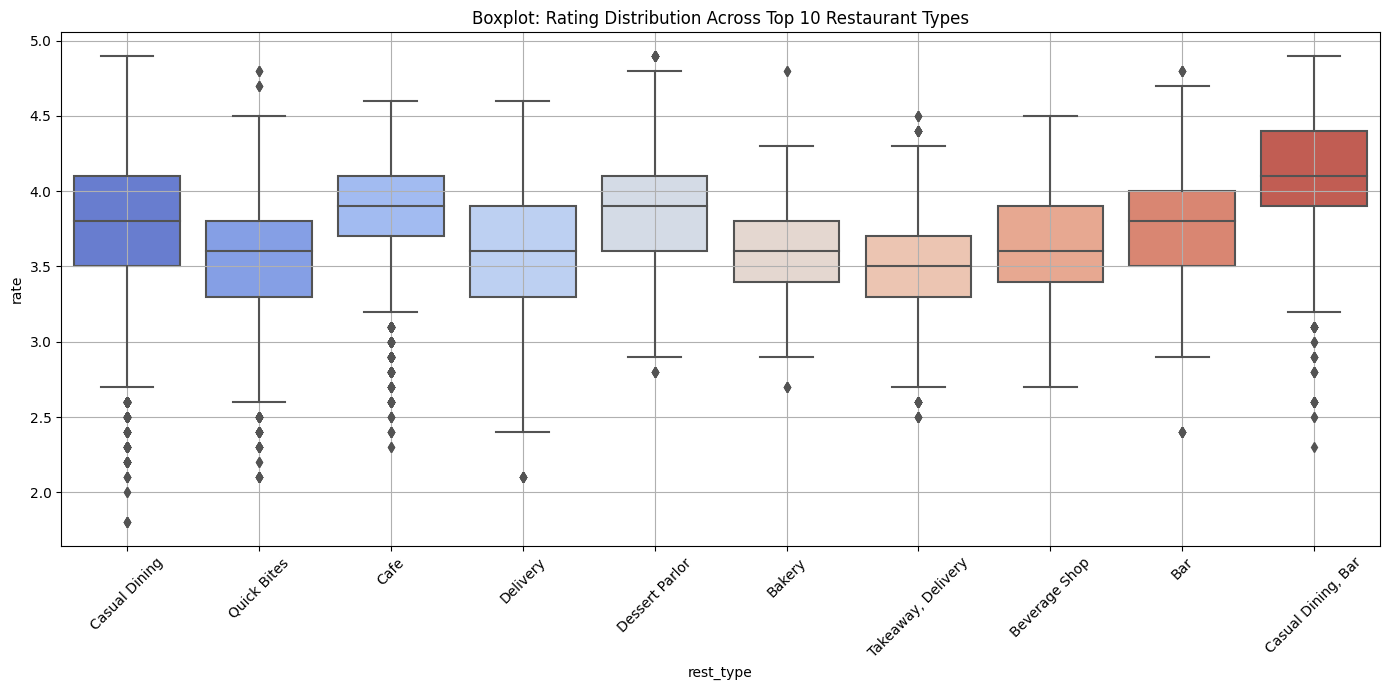

In [29]:
top_types = df['rest_type'].value_counts().head(10).index
filtered_df = df[df['rest_type'].isin(top_types)]
plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_df, x='rest_type', y='rate', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Boxplot: Rating Distribution Across Top 10 Restaurant Types")
plt.grid(True)
plt.tight_layout()
plt.show()


### 10 Most Popular Restaurant Chains

<Axes: ylabel='name'>

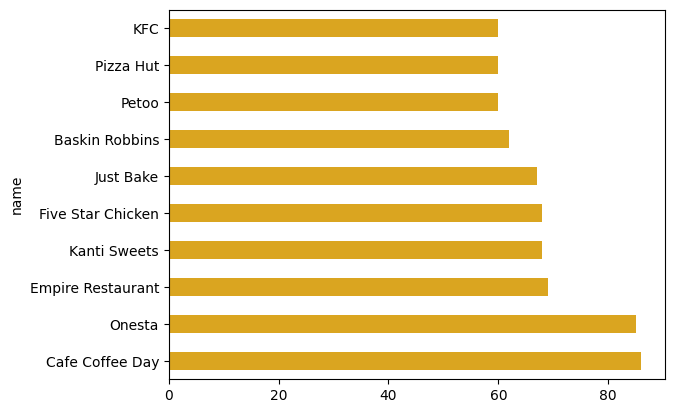

In [30]:
chain_df = df['name'].value_counts().head(10)
chain_df.plot(kind='barh', color='goldenrod')


## ✅ Conclusion

* Online ordering, North Indian cuisine, and Quick Bites are major trends.
* High-rated restaurants aren't always costly — customer service matters more.
* Location and restaurant type heavily influence rating and popularity.
* Data-driven decisions can improve customer targeting and new outlet planning.
